
# Question 1: 
## Part A:

## What is a Support Vector?
Support vectors are the data points closest to the decision boundary (or hyperplane) in SVM, playing a critical role in determining the optimal hyperplane for separating data classes.


## Soft Margin vs. Hard Margin Classifier
- **Hard Margin**: Assumes perfect separability; fails for noisy data.
- **Soft Margin**: Introduces slack variables to allow misclassification, balancing error and margin.


# **Question 1 Part B :**
### Train a linear SVM classifier on the MNIST. SVM classifiers are binary classifiers (you will need to use one-versus-all to classify all 10 digits), and also report its training accuracy.

In [2]:
import os
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

def load_images(file_path):
    with open(file_path, 'rb') as f:
        magic_number, num_images, rows, cols = np.frombuffer(f.read(16), dtype=np.uint32, count=4).byteswap()
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows * cols)
    return images

def load_labels(file_path):
    with open(file_path, 'rb') as f:
        magic_number, num_labels = np.frombuffer(f.read(8), dtype=np.uint32, count=2).byteswap()
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

dataset_folder = "mnist_dataset"

train_images_path = os.path.join(dataset_folder, 'train-images.idx3-ubyte')
train_labels_path = os.path.join(dataset_folder, 'train-labels.idx1-ubyte')
test_images_path = os.path.join(dataset_folder, 't10k-images.idx3-ubyte')
test_labels_path = os.path.join(dataset_folder, 't10k-labels.idx1-ubyte')

# Load training and test data
X_train = load_images(train_images_path)
y_train = load_labels(train_labels_path)
X_test = load_images(test_images_path)
y_test = load_labels(test_labels_path)

# Check if data is loaded correctly
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Train Linear SVM with One-vs-Rest (OvR) strategy
def train_pred(X_train, X_test):
  svm_classifier = LinearSVC(random_state=42, multi_class='ovr', max_iter=5000, dual=False)
  svm_classifier.fit(X_train, y_train)
  print("Model training complete.")

  # Predict on training set
  y_train_pred = svm_classifier.predict(X_train)

  # Predict on test set
  y_test_pred = svm_classifier.predict(X_test)
  return y_train_pred, y_test_pred

# Visualize some test predictions
def visualize_predictions(images, true_labels, predicted_labels, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(12, 3))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"T: {true_labels[i]}, P: {predicted_labels[i]}")
        ax.axis('off')
    plt.show()

def display_plot(X_test,y_test,y_train,y_test_pred,y_train_pred):

  # Display a few random images with their true and predicted labels
  num_images = 10
  indices = np.random.randint(0, X_test.shape[0], num_images)  # Select random indices
  random_images = X_test[indices]
  true_labels = y_test[indices]
  predicted_labels = y_test_pred[indices]

  visualize_predictions(random_images, true_labels, predicted_labels, num_images)


  # Calculate training accuracy
  train_accuracy = accuracy_score(y_train, y_train_pred)
  print(f"Training Accuracy: {train_accuracy:.2%}")

  # Calculate testing accuracy
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print(f"Testing Accuracy: {test_accuracy:.2%}")

  # Compute confusion matrix
  cm = confusion_matrix(y_test, y_test_pred)

  # Plot confusion matrix using seaborn heatmap
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("Actual Label")
  plt.show()

# Train Linear SVM without Scaling
print("Training Linear SVM classifier without Scaling...")
y_train_pred, y_test_pred = train_pred(X_train, X_test)


X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)
Training Linear SVM classifier without Scaling...
Model training complete.


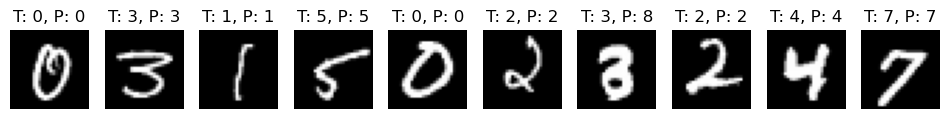

Training Accuracy: 92.76%
Testing Accuracy: 91.68%


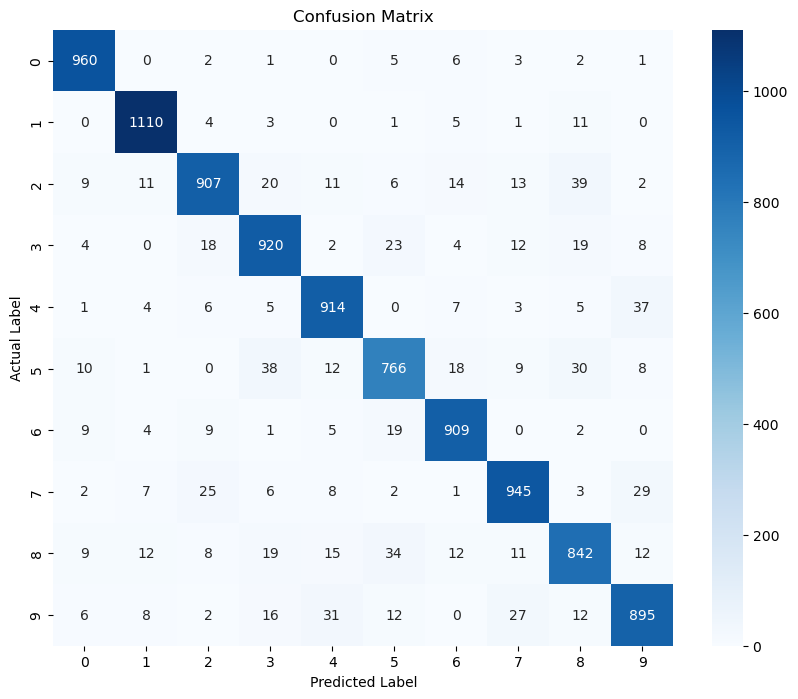

In [3]:
display_plot(X_test,y_test,y_train,y_test_pred,y_train_pred)

# **Question 1 Part C :**
### Scale (standardize) the data first, retrain a linear SVM classifier and also report its training accuracy.

# **Using Standard Scalar**

Training Linear SVM classifier on Standard scaled data...
Model training complete.


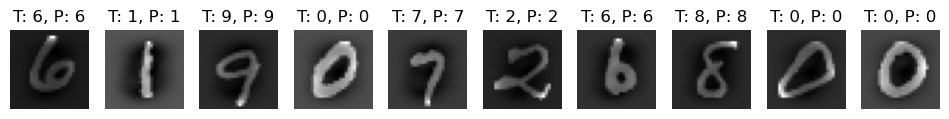

Training Accuracy: 92.75%
Testing Accuracy: 91.57%


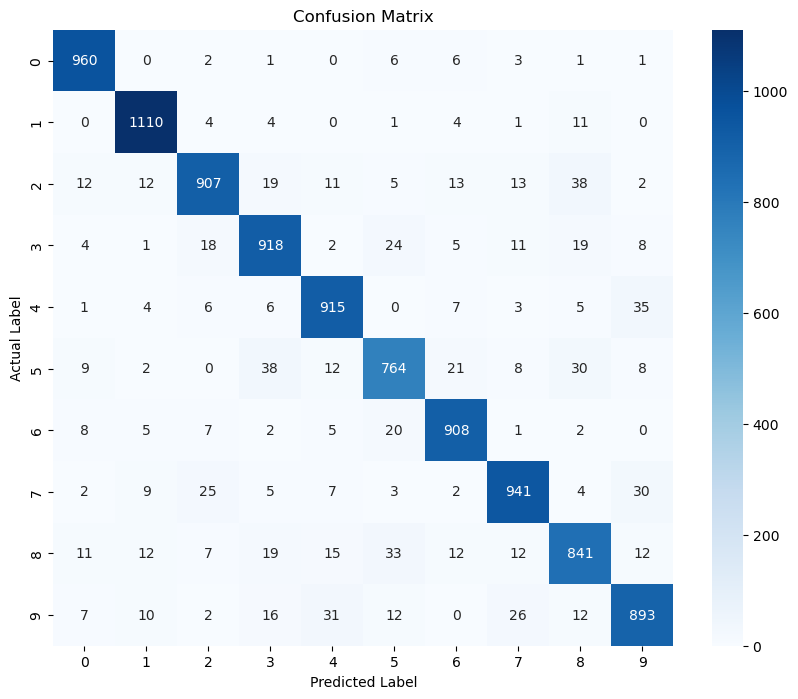

In [4]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

# Train Linear SVM with One-vs-Rest (OvR) strategy
print("Training Linear SVM classifier on Standard scaled data...")
y_train_pred_scaled, y_test_pred_scaled = train_pred(X_train_scaled, X_test_scaled)

# Visualize some test predictions
display_plot(X_test_scaled,y_test,y_train,y_test_pred_scaled,y_train_pred_scaled)


# **Using** **MinMax** **Scalar**

Training Linear SVM classifier on MinMax scaled data...
Model training complete.


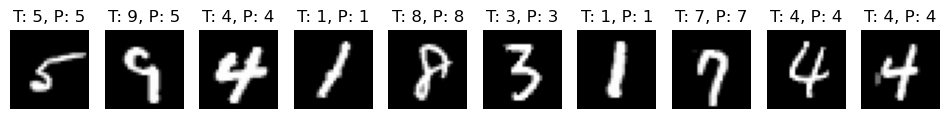

Training Accuracy: 92.63%
Testing Accuracy: 91.81%


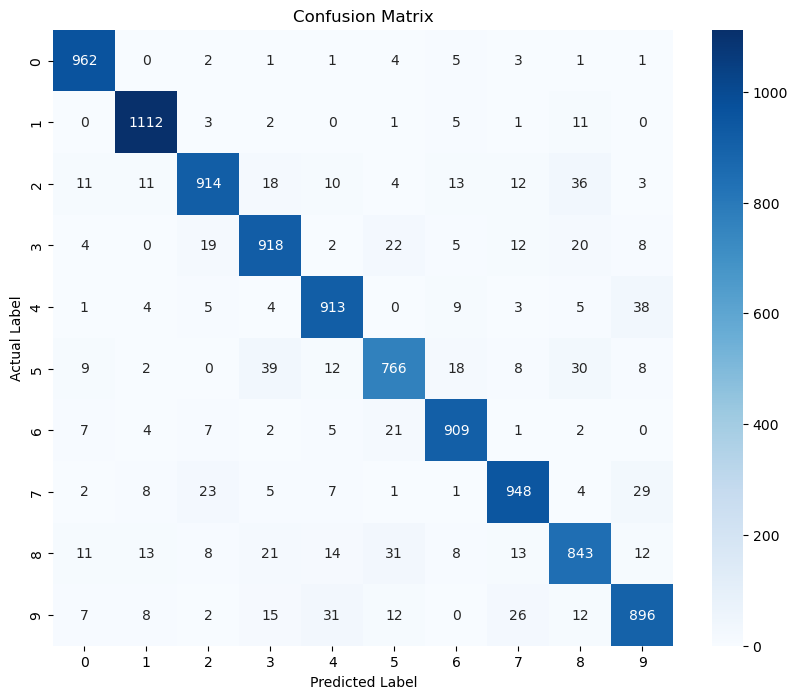

In [5]:
# Scale the data
MinMax_scaler = MinMaxScaler()
X_train_minmax_scaled = MinMax_scaler.fit_transform(X_train.astype(np.float64))
X_test_minmax_scaled = MinMax_scaler.transform(X_test.astype(np.float64))

# Train Linear SVM with One-vs-All (OvA) strategy
print("Training Linear SVM classifier on MinMax scaled data...")
y_train_pred_minmax_scaled, y_test_pred_minmax_scaled = train_pred(X_train_minmax_scaled, X_test_minmax_scaled)

# Visualize some test predictions
display_plot(X_test_minmax_scaled,y_test,y_train,y_test_pred_minmax_scaled,y_train_pred_minmax_scaled)

# **Question 1 Part D:**
### Now retrain the classifier with a non-linear SVM using Radial Basis Function (RBF) Kernel and also report its training accuracy


Training Non- Linear SVM classifier with RBF kernel...


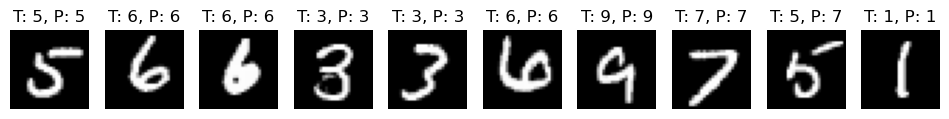

Training Accuracy: 98.66%
Testing Accuracy: 96.60%


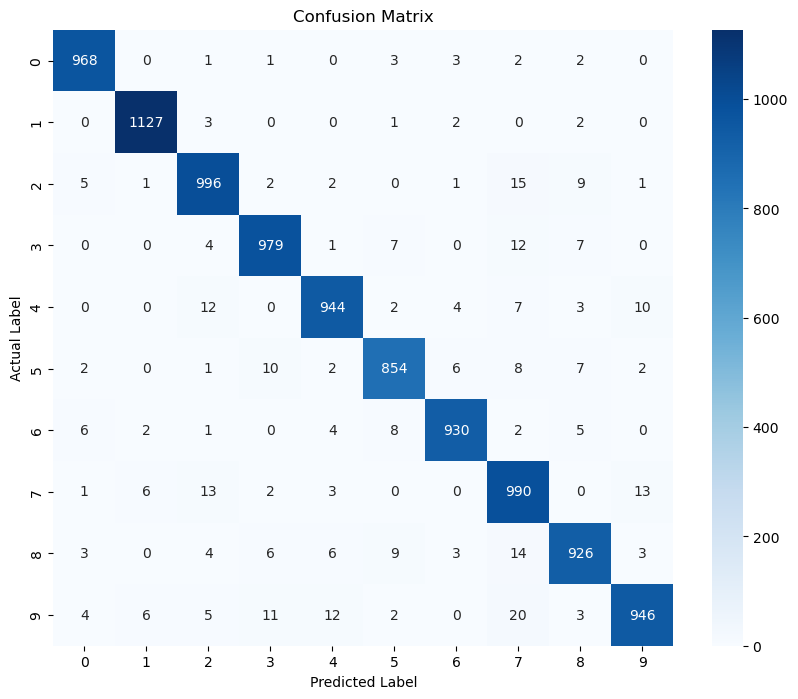

In [6]:
from sklearn.svm import SVC

def train_rbf_svm(X_train, y_train, X_test, y_test, C, gamma):
    svm_classifier = SVC(kernel='rbf', C=C, gamma=gamma)
    svm_classifier.fit(X_train, y_train)

    y_train_pred = svm_classifier.predict(X_train)
    y_test_pred = svm_classifier.predict(X_test)

    return y_train_pred, y_test_pred

print("Training Non- Linear SVM classifier with RBF kernel...")
y_train_pred_rbf, y_test_pred_rbf = train_rbf_svm(X_train_scaled, y_train, X_test_scaled, y_test, C=1.0, gamma='scale')

display_plot(X_test, y_test, y_train, y_test_pred_rbf, y_train_pred_rbf)

# Question 2
### Part A

Epoch 1/20


c:\Users\GNG\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8059 - loss: 0.6286 - val_accuracy: 0.9575 - val_loss: 0.1425
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9451 - loss: 0.1883 - val_accuracy: 0.9716 - val_loss: 0.0990
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9594 - loss: 0.1346 - val_accuracy: 0.9746 - val_loss: 0.0868
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9668 - loss: 0.1100 - val_accuracy: 0.9757 - val_loss: 0.0814
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9711 - loss: 0.0933 - val_accuracy: 0.9778 - val_loss: 0.0730
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9743 - loss: 0.0805 - val_accuracy: 0.9777 - val_loss: 0.0747
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9756 - loss: 0.0739 - val_accuracy: 0.9789 - val_loss: 0.0721
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9784 - loss: 0.0690 - val_accuracy: 0.9771 - val_

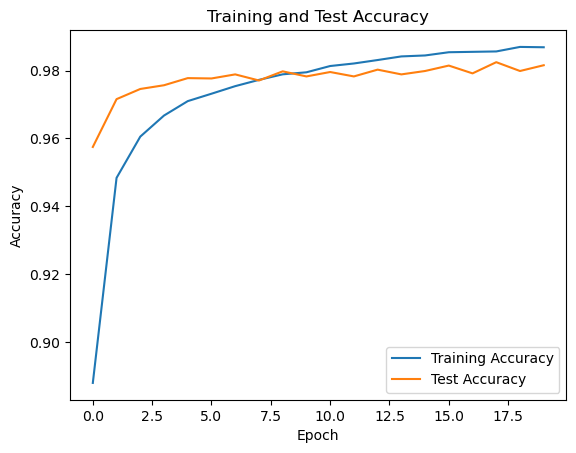

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [7]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0


x_train = x_train.reshape(x_train.shape[0], -1)  # Shape: (60000, 784)
x_test = x_test.reshape(x_test.shape[0], -1)    # Shape: (10000, 784)


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),   # Input + First Hidden Layer
    Dropout(0.2),                                        # Dropout to prevent overfitting
    Dense(64, activation='relu'),                       # Second Hidden Layer
    Dropout(0.2),                                        # Dropout to prevent overfitting
    Dense(10, activation='softmax')                     # Output Layer
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test), batch_size=64)


model.save_weights('mnist_ann.weights.h5')
print("Model weights saved to 'mnist_ann.weights.h5'")

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2%}")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')
plt.show()

model.summary()


# Part B

Epoch 1/5


c:\Users\GNG\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8796 - loss: 0.6825 - val_accuracy: 0.9781 - val_loss: 0.0677
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9794 - loss: 0.0679 - val_accuracy: 0.9778 - val_loss: 0.0782
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9845 - loss: 0.0505 - val_accuracy: 0.9874 - val_loss: 0.0429
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9872 - loss: 0.0394 - val_accuracy: 0.9885 - val_loss: 0.0378
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9895 - loss: 0.0343 - val_accuracy: 0.9837 - val_loss: 0.0570
Model weights saved to 'cnn.weights.h5'
313/313 - 0s - 1ms/step - accuracy: 0.9837 - loss: 0.0570
Test accuracy: 0.9836999773979187


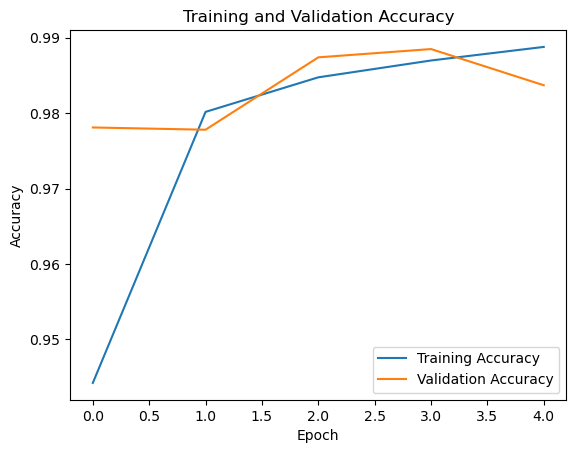

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

In [8]:

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

# Save model weights
model.save_weights('cnn.weights.h5')
print("Model weights saved to 'cnn.weights.h5'")

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Display model summary
model.summary()


# Question 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\GNG\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\GNG\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\GNG\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\GNG\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\GNG\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\GNG\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\GNG\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\GNG\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


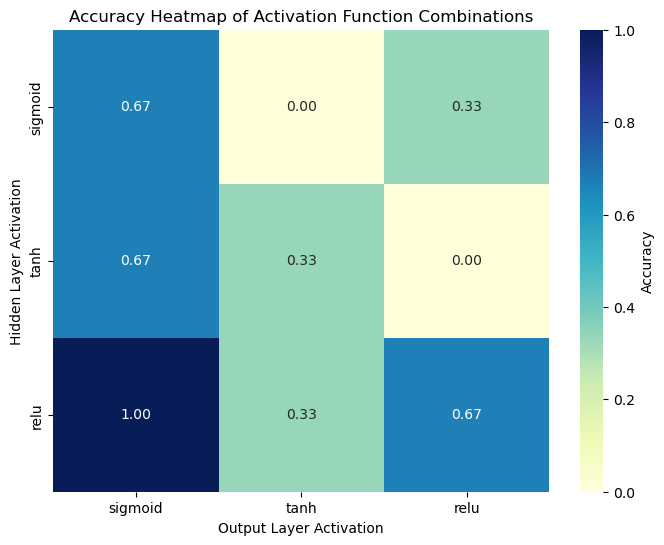

          sigmoid      tanh      relu
sigmoid  0.666667  0.000000  0.333333
tanh     0.666667  0.333333  0.000000
relu     1.000000  0.333333  0.666667


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(42)
tf.random.set_seed(42)

# Data Preparation
data = np.array([
    [0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 1],
    [0, 1, 0, 1, 1, 0],
    [0, 0, 1, 1, 1, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 1],
    [0, 1, 1, 0, 1, 0],
    [1, 1, 1, 0, 0, 1],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1],
    [0, 1, 1, 1, 0, 1],
    [1, 1, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1],
])

X = data[:, :-1]
y = data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def build_model(activation_hidden, activation_output):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(5, activation=activation_hidden, input_shape=(5,)),
        tf.keras.layers.Dense(1, activation=activation_output)
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


activation_functions_hidden = ['sigmoid', 'tanh', 'relu']
activation_functions_output = ['sigmoid', 'tanh', 'relu']
accuracy_matrix = np.zeros((len(activation_functions_hidden), len(activation_functions_output)))


for i, act_hidden in enumerate(activation_functions_hidden):
    for j, act_output in enumerate(activation_functions_output):
        model = build_model(act_hidden, act_output)
        model.fit(X_train, y_train, epochs=70, verbose=0)
        y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
        accuracy_matrix[i, j] = accuracy_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    accuracy_matrix,
    annot=True,
    fmt=".2f",
    xticklabels=activation_functions_output,
    yticklabels=activation_functions_hidden,
    cmap="YlGnBu",
    cbar_kws={"label": "Accuracy"}
)
plt.title("Accuracy Heatmap of Activation Function Combinations")
plt.xlabel("Output Layer Activation")
plt.ylabel("Hidden Layer Activation")
plt.show()
accuracy_df = pd.DataFrame(
    accuracy_matrix,
    index=activation_functions_hidden,
    columns=activation_functions_output
)

print(accuracy_df)
